# Part 1 - Identify the Frauds with the Self-Organizing Map

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

In [3]:
# Importing the dataset
dataset = pd.read_csv('./Data/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [5]:
# Training the SOM
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

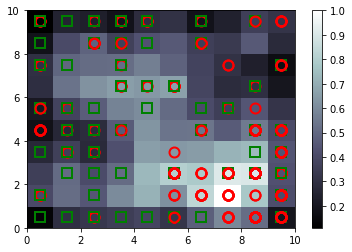

In [6]:
# Visualizing the results
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [9]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,1)], mappings[(7,2)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [11]:
len(frauds)

23

# Part 2 - Now let's make the ANN!

In [13]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\leoqu\documents\virtual_env\vdlaz\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-82e49ff76323>", line 2, in <module>
    from keras.models import Sequential
  File "c:\users\leoqu\documents\virtual_env\vdlaz\lib\site-packages\keras\__init__.py", line 3, in <module>
    from . import utils
  File "c:\users\leoqu\documents\virtual_env\vdlaz\lib\site-packages\keras\utils\__init__.py", line 6, in <module>
    from . import conv_utils
  File "c:\users\leoqu\documents\virtual_env\vdlaz\lib\site-packages\keras\utils\conv_utils.py", line 9, in <module>
    from .. import backend as K
  File "c:\users\leoqu\documents\virtual_env\vdlaz\lib\site-packages\keras\backend\__init__.py", line 1, in <module>
    from .load_backend import epsilon
  File "c:\users\leoqu\documents\virtual_env\vdlaz\lib\site-packages\keras\backend\load_backend.py", 

ImportError: Could not find the DLL(s) 'msvcp140_1.dll'. TensorFlow requires that these DLLs be installed in a directory that is named in your %PATH% environment variable. You may install these DLLs by downloading "Microsoft C++ Redistributable for Visual Studio 2015, 2017 and 2019" for your platform from this URL: https://support.microsoft.com/help/2977003/the-latest-supported-visual-c-downloads

In [ ]:




# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]